<a href="https://colab.research.google.com/github/Gh0st116/Neural-networks/blob/main/primeira_rede_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   Tensorflow = inclui o keras, para rede neural
*   Numpy = manipulação de vetores dos dados
*   Matplotlib.pyplot = gráficos dos resultados e do loss


Os dados de treinamento são:

xs (entradas): [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]

ys (saídas): [-3.0, -1.0, 1.0, 3.0, 5.0, 7.0]

Usamos uma função para calcular as saídas, e a rede precisa descobrir como chegamos nesses resultados

In [ ]:
# Rede simples de regressao linear
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Definindo a rede
model = tf.keras.Sequential([tf.keras.layers.Dense(units = 1, input_shape = [1])])

# Configurando e compilando a rede
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

# Train data
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype = float)
ys = 2 * xs - 1

# Treinando a rede
history = model.fit(xs, ys, epochs = 1000, verbose = 0)

# Test data
print('y(10) = ', model.predict([10.0]))

1/1 [==============================] - 0s 126ms/step
y(10) =  [[18.999928]]


Model: "rede_IF_01"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None
1/1 [==============================] - 0s 42ms/step
dict_keys(['loss', 'mean_absolute_error'])


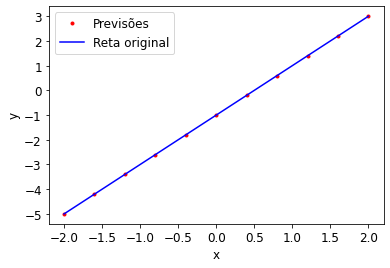

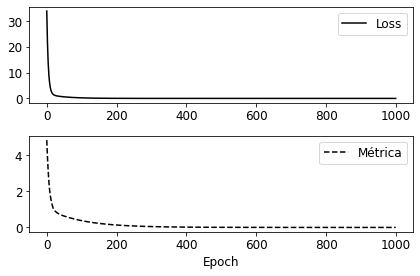

In [ ]:
# Rede completa para regressao linear
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# D train (data set)
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype = float)
ys = 2 * xs - 1

# Criando a rede neural
model = tf.keras.Sequential(name = 'rede_IF_01')

# Configurando a primeira camada da rede
model.add(tf.keras.layers.Dense(1, input_dim = 1, use_bias = 1, activation = 'linear'))

# Compilando a rede
opt = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.0)

# Otimizador e funcao loss sao obrigatorias, mas funcao de metrica nao
model.compile(optimizer = opt, loss = 'mean_squared_error', metrics = 'mean_absolute_error')
print(model.summary())

# Treinando a rede
history = model.fit(xs, ys, epochs = 1000, verbose = 0)

# Testando a rede
xs_test = np.linspace(-2, 2, 11)
ys_test = model.predict(xs_test)


# Fazendo os gráficos
plt.rcParams.update({'font.size': 12})
plt.figure()
plt.plot(xs_test, ys_test, 'r.')
plt.plot(xs_test, (2 * xs_test - 1), 'b-')
plt.legend(['Previsões', 'Reta original'])
plt.xlabel('x')
plt.ylabel('y')

# Mostra os dados em history
print(history.history.keys())

# Plota o loss e a metrica
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], 'k')
plt.legend(['Loss'])
plt.subplot(2, 1, 2)
plt.plot(history.history['mean_absolute_error'], 'k--')
plt.legend(['Métrica'])
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()